In [196]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.font_manager as fm
from cycler import cycler

import datetime as dt

In [197]:
darkblue = "#122b52"
lightblue = "#0099db"
darkgray = "#575760"
lightgray = "#b2b2be"
akzent1 = "#e574bc"
akzent2 = "#f4e04d"

theme = 'light' # 'light'|'dark'

if theme == 'light':
    mybackgroundcolor = 'white'
    myfontcolor = darkgray
    myaxiscolor = lightgray
    mytickcolor = darkgray
elif theme == 'dark':
    mybackgroundcolor = darkgray
    myfontcolor = 'white'
    myaxiscolor = lightgray
    mytickcolor = lightgray
    
matplotlib.rcParams['axes.facecolor'] = mybackgroundcolor
matplotlib.rcParams['figure.facecolor'] = mybackgroundcolor
    
# "cycling" colors for plot contents
matplotlib.rcParams['axes.prop_cycle'] = cycler(color=[lightblue, darkgray, akzent1, akzent2])
matplotlib.rcParams['axes.spines.left'] = True
matplotlib.rcParams['axes.spines.bottom'] = True
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.edgecolor'] = myaxiscolor

matplotlib.rcParams['axes.labelcolor'] = myfontcolor

matplotlib.rcParams['xtick.color'] = myfontcolor
matplotlib.rcParams['ytick.color'] = myfontcolor

#matplotlib.rcParams[] = 
#matplotlib.rcParams[] = 
matplotlib.rcParams['axes.axisbelow'] = True  # plot grid/axis-lines below plot elements
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['axes.grid.axis'] = 'x' # 'both'
#axes.grid.which:    major   # grid lines at {major, minor, both} ticks
matplotlib.rcParams['grid.alpha'] = 1
matplotlib.rcParams['grid.color'] = lightgray

font = {'family' : 'Roboto'}
#prop = fm.FontProperties(fname='/usr/share/fonts/truetype/groovygh.ttf')
matplotlib.rc('font', **font)

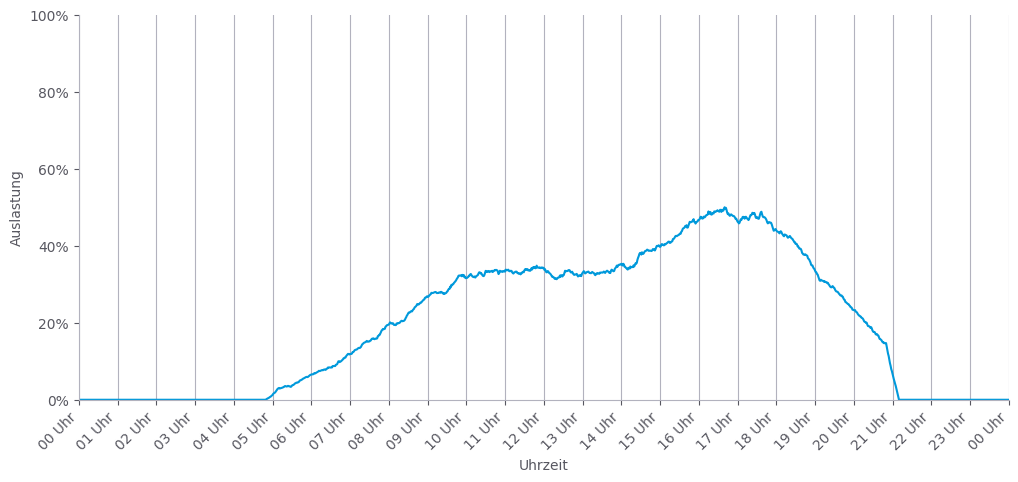

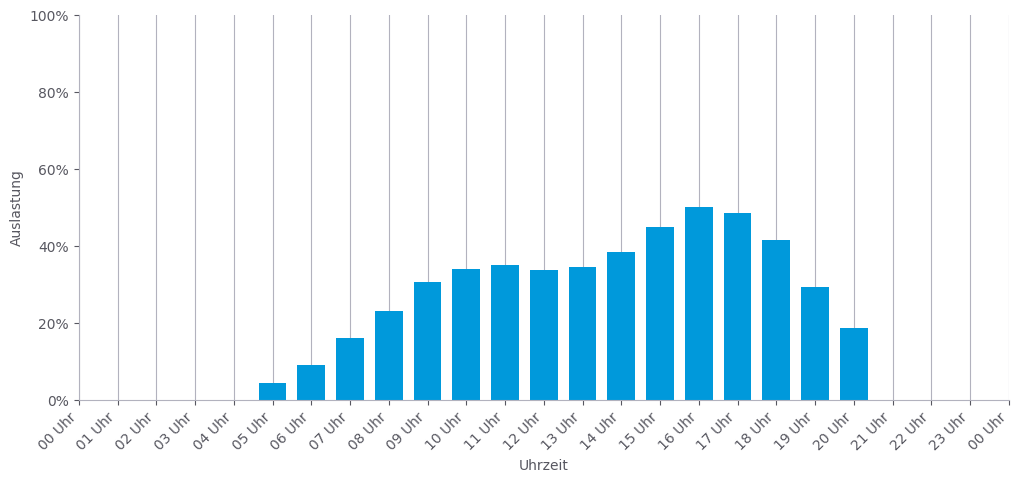

In [195]:
# sample from two gaussians to create the data, usually peak at 09:00 and at 17:00

def sample_minutes(num_samples = 500_000):
    num_trainees_per_day = num_samples

    times = []
    
    min_hour = 5
    max_hour = 21
    
    minutes_of_day = []
    hours_of_day = []
    
    for hour in range(24):
        mytime = dt.datetime.strptime('%02d00'%(hour),'%H%M').time()
        mydatetime = dt.datetime.combine(dt.date.today(), mytime)
        hours_of_day.append([mydatetime, 0])
    
    for i in range(24*60):
        hour = int(np.floor(i / 60))
        minute = int((i % 60))
        mytime = dt.datetime.strptime('%02d%02d'%(hour,minute),'%H%M').time()
        mydatetime = dt.datetime.combine(dt.date.today(), mytime)
        minutes_of_day.append([mydatetime, 0])

    for i in range(num_trainees_per_day):
        if np.random.rand() > 0.6:
            time = np.random.normal(10.5, 2.5)
        else:
            time = np.random.normal(17, 2.5)

        if time > min_hour and time < max_hour:
            # we have a float like 7.9
            hour = int(np.floor(time))
            minute = int((time % 1) * 60)
            
            minutes_of_day[hour*60 + minute][1] += 1
            hours_of_day[hour][1] += 1

    minutes_of_day = np.array(minutes_of_day)  
    hours_of_day = np.array(hours_of_day)
    
    # smooth out so it looks good
    kernel_size = 20
    kernel = np.ones(kernel_size) / kernel_size
    data_convolved = np.convolve(minutes_of_day[:,1], kernel, mode='same')
    
    # normalize minute-data
    # scale so that max is 50%
    data_convolved /= (max(data_convolved) * 2)
    # to percent
    data_convolved *= 100
    
    minutes_of_day[:,1] = data_convolved
    
    # normalize hour-data
    hours_of_day[:,1] /= (max(hours_of_day[:,1]) * 2)
    hours_of_day[:,1] *= 100
        
    return minutes_of_day, hours_of_day
    
    
def lineplot(minutes_of_day):
    # graph styling
    dtFmt = mdates.DateFormatter('%H Uhr') # define the formatting
            
    fig = plt.figure(figsize=(12, 5))
    plt.plot(minutes_of_day[:,0], minutes_of_day[:,1])
    plt.ylim((0,100))
    
    plt.gca().xaxis.set_major_locator(mdates.HourLocator())
    plt.gca().xaxis.set_major_formatter(dtFmt)
    
    plt.gca().yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter())
    
    # rotate the xtick-labels
    plt.setp(plt.gca().get_xticklabels(), ha="right", rotation=45)
    
    # start- and end-datetime (to avoid having 23:00 from the prev. day, or 01:00 of the next day)
    mytime = dt.datetime.strptime('0000','%H%M').time()
    startdt = dt.datetime.combine(dt.date.today(), mytime)
    plt.gca().set_xlim([startdt, startdt + dt.timedelta(days=1)])
    
    # axis labels
    plt.xlabel('Uhrzeit')
    plt.ylabel('Auslastung')
        
    plt.show()

    
def barplot(hours_of_day):
    # graph styling
    dtFmt = mdates.DateFormatter('%H Uhr') # define the formatting
    
    fig = plt.figure(figsize=(12, 5))
    
    plt.bar(hours_of_day[:,0], height=hours_of_day[:,1], width=0.03)
    
    plt.ylim((0,100))
    
    plt.gca().xaxis.set_major_locator(mdates.HourLocator())
    plt.gca().xaxis.set_major_formatter(dtFmt)
    
    plt.gca().yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter())
    
    # rotate the xtick-labels
    plt.setp(plt.gca().get_xticklabels(), ha="right", rotation=45)
    
    # start- and end-datetime (to avoid having 23:00 from the prev. day, or 01:00 of the next day)
    mytime = dt.datetime.strptime('0000','%H%M').time()
    startdt = dt.datetime.combine(dt.date.today(), mytime)
    plt.gca().set_xlim([startdt, startdt + dt.timedelta(days=1)])
    
    # axis labels
    plt.xlabel('Uhrzeit')
    plt.ylabel('Auslastung')
    
    plt.show()

    
samples_mins, samples_hours = sample_minutes(100_000)
lineplot(samples_mins)
barplot(samples_hours)